In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data = pd.read_excel('data tugas.xlsx')

In [37]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,45,Local-gov,164427,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
1,38,Private,91039,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,60,United-States,>50K
2,40,Private,347934,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
3,46,Federal-gov,371373,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,35,Private,32220,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,60,United-States,<=50K
5,34,Private,187251,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,25,United-States,<=50K
6,33,Private,178107,Bachelors,13,Never-married,Craft-repair,Own-child,White,Male,0,0,20,United-States,<=50K
7,41,Private,343121,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,36,United-States,<=50K
8,20,Private,262749,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
9,23,Private,403107,5th-6th,3,Never-married,Other-service,Own-child,White,Male,0,0,40,El-Salvador,<=50K


## Membaca data kosong sebagai missing value

In [40]:
data = data.replace(' ?',np.nan)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         281 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        281 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    295 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


## Memisahkan kolom2

In [42]:
Y = ['type']
X_int_1 = ['age', 'education-num']
X_int_2 = ['hours-per-week', 'capital-gain','capital-loss','fnlwgt']
X_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','sex','native-country']

In [44]:
data_Y = data[Y]
data_int = data[X_int_1].astype(int)
data_float = data[X_int_2].astype(float)
data_cat = data[X_cat]

## Melihat jumlah tipe

In [45]:
#show all distinct value of class
print(data_Y['type'].unique())

[' <=50K' ' >50K']


### mengganti missing data

In [46]:
data.isnull().sum()

age                0
workclass         19
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation        19
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     5
type               0
dtype: int64

In [47]:
## find missing data for each data type and fill it with mean and mode
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [52]:
data_cat_clean = pd.concat(data_cat_array)

In [53]:
data_cleaned_sebelum = pd.concat([data_int, data_float, data_cat_clean, data_Y], axis=1)

In [54]:
data_cleaned_sebelum.isnull().any()

age               False
education-num     False
hours-per-week    False
capital-gain      False
capital-loss      False
fnlwgt            False
workclass         False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
native-country    False
type              False
dtype: bool

## Standardisasi

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
data_float['fnlwgt'] = StandardScaler().fit(data_float[['fnlwgt']]).transform(data_float[['fnlwgt']])
data_int['education-num'] = StandardScaler().fit(data_int[['education-num']]).transform(data_int[['education-num']])
data_float['capital-gain'] = StandardScaler().fit(data_float[['capital-gain']]).transform(data_float[['capital-gain']])
data_float['capital-loss'] = StandardScaler().fit(data_float[['capital-loss']]).transform(data_float[['capital-loss']])
data_float['hours-per-week'] = StandardScaler().fit(data_float[['hours-per-week']]).transform(data_float[['hours-per-week']])

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [58]:
data_cleaned = pd.concat([data_int, data_float, data_cat_clean, data_Y], axis=1)
data_cleaned.head(10)

,age,education-num,hours-per-week,capital-gain,capital-loss,fnlwgt,workclass,education,marital-status,occupation,relationship,race,sex,native-country,type
0,45,1.177309,0.023696,-0.152801,-0.19734,-0.246596,Local-gov,Bachelors,Divorced,Prof-specialty,Unmarried,White,Female,United-States,<=50K
1,38,1.177309,1.639366,2.212352,-0.19734,-0.972423,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K
2,40,-0.465448,-0.380221,-0.152801,-0.19734,1.568336,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Female,United-States,<=50K
3,46,-0.465448,0.023696,-0.152801,-0.19734,1.800153,Federal-gov,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
4,35,0.766620,1.639366,-0.152801,-0.19734,-1.554158,Private,Assoc-acdm,Never-married,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
5,34,-0.465448,-1.188056,-0.152801,-0.19734,-0.020861,Private,HS-grad,Divorced,Prof-specialty,Unmarried,White,Female,United-States,<=50K
6,33,1.177309,-1.591973,-0.152801,-0.19734,-0.111298,Private,Bachelors,Never-married,Craft-repair,Own-child,White,Male,United-States,<=50K
7,41,-0.465448,-0.299437,-0.152801,-0.19734,1.520734,Private,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States,<=50K
8,20,-0.054759,0.023696,-0.152801,-0.19734,0.725834,Private,Some-college,Never-married,Machine-op-inspct,Own-child,White,Male,United-States,<=50K
9,23,-2.929583,0.023696,-0.152801,-0.19734,2.114011,Private,5th-6th,Never-married,Other-service,Own-child,White,Male,El-Salvador,<=50K


### deteksi outlier

In [63]:
### for detect outlier
data_num_w_type = pd.concat([data_int, data_float, data_Y], axis=1)

In [64]:
data_num_w_type.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,fnlwgt,type
0,45,1.177309,0.023696,-0.152801,-0.19734,-0.246596,<=50K
1,38,1.177309,1.639366,2.212352,-0.19734,-0.972423,>50K
2,40,-0.465448,-0.380221,-0.152801,-0.19734,1.568336,<=50K
3,46,-0.465448,0.023696,-0.152801,-0.19734,1.800153,<=50K
4,35,0.766620,1.639366,-0.152801,-0.19734,-1.554158,<=50K


In [65]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

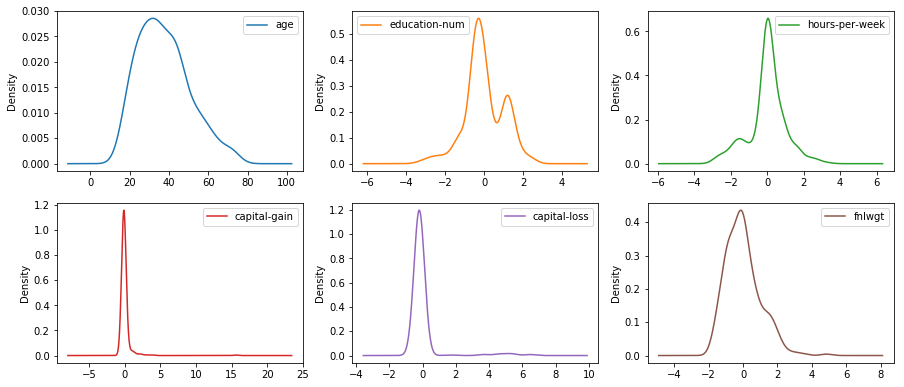

In [68]:
# Univariate Density Plots
data_num_w_type.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

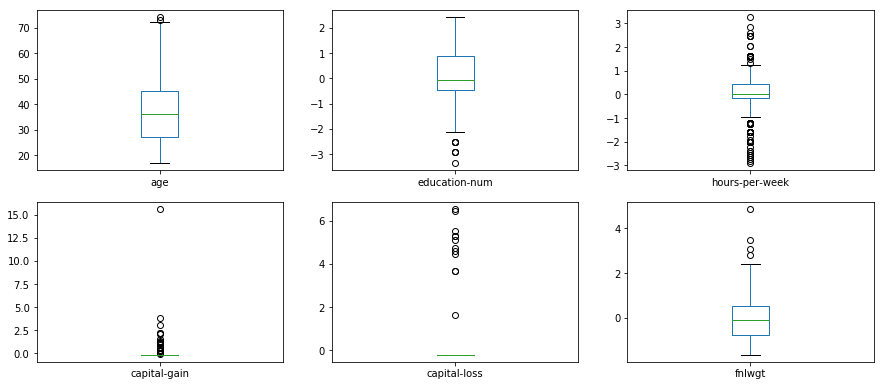

In [69]:
data_num_w_type.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [72]:
colors_palette = {" >50K": "red",  " <=50K": "blue"}
colors = [colors_palette[c] for c in data_num_w_type['type']]   

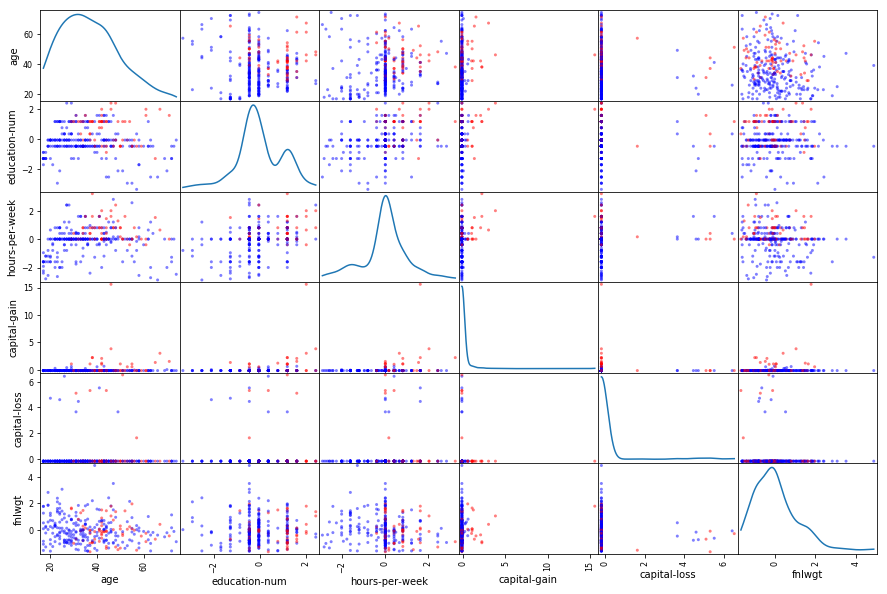

In [73]:
## red : >50K
## blue: <=50K
from pandas.plotting import scatter_matrix
scatter_matrix(data_num_w_type, color=colors, diagonal='kde')
plt.show()

In [75]:
data_cleaned = pd.concat([data_num_w_type, data_cat_clean], axis=1)

In [77]:
# rearrange columns position to default
data_cleaned = data_cleaned[data.columns]
data_cleaned.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,45,Local-gov,-0.246596,Bachelors,1.177309,Divorced,Prof-specialty,Unmarried,White,Female,-0.152801,-0.19734,0.023696,United-States,<=50K
1,38,Private,-0.972423,Bachelors,1.177309,Married-civ-spouse,Sales,Husband,White,Male,2.212352,-0.19734,1.639366,United-States,>50K
2,40,Private,1.568336,HS-grad,-0.465448,Never-married,Other-service,Not-in-family,White,Female,-0.152801,-0.19734,-0.380221,United-States,<=50K
3,46,Federal-gov,1.800153,HS-grad,-0.465448,Divorced,Adm-clerical,Not-in-family,White,Male,-0.152801,-0.19734,0.023696,United-States,<=50K
4,35,Private,-1.554158,Assoc-acdm,0.766620,Never-married,Exec-managerial,Not-in-family,White,Female,-0.152801,-0.19734,1.639366,United-States,<=50K


In [78]:
data_cleaned.to_csv('Bima Putra Goklas_06211640000124.csv', index=0)